Morris Lecar model


\begin{aligned}C{\frac {dV}{dt}}&~=~I-g_{\mathrm {L} }(V-V_{\mathrm {L} })-g_{\mathrm {Ca} }M_{\mathrm {ss} }(V-V_{\mathrm {Ca} })-g_{\mathrm {K} }N(V-V_{\mathrm {K} })\\[5pt]{\frac {dN}{dt}}&~=~{\frac {N_{\mathrm {ss} }-N}{\tau _{N}}}\end{aligned}


\begin{aligned}M_{\mathrm {ss} }&~=~{\frac {1}{2}}\cdot \left(1+\tanh \left[{\frac {V-V_{1}}{V_{2}}}\right]\right)\\[5pt]N_{\mathrm {ss} }&~=~{\frac {1}{2}}\cdot \left(1+\tanh \left[{\frac {V-V_{3}}{V_{4}}}\right]\right)\\[5pt]\tau _{N}&~=~1/\left(\varphi \cosh \left[{\frac {V-V_{3}}{2V_{4}}}\right]\right)\end{aligned}


Input=60 after 500 timesteps.


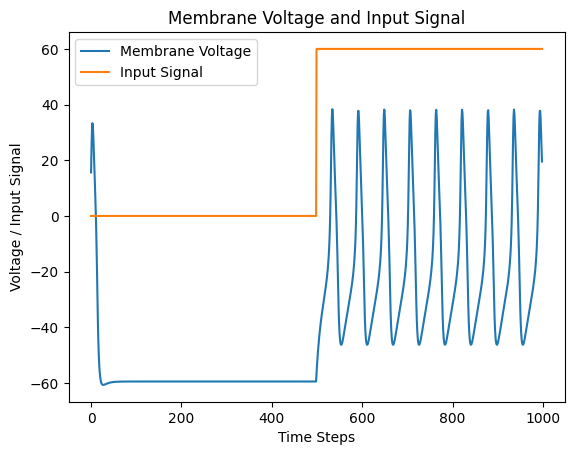

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Time step
dt = 1

# Initial values
Iapp = 0
V = 0
n = 0

# Reversal potentials
ECa = 120  # mV
EK = -84  # mV
EL = -60  # mV
Cm = 20  # microF/cm2

gL = 2  # mS/cm2
gK = 8
gCa = 4
gKCa = 0.75

V1 = -1.2
V2 = 18

# SNLC
V3 = 12
V4 = 17.4
phi = 0.067
gCa = 4

#  #Hopf
#  V3 = 2
#  V4 = 30
#  phi = 0.04
#  gCa = 4.4

#  #Homoclinic
#  V3 = 12
#  V4 = 17.4
#  phi = 0.23
#  gCa = 4

randomCurrent = 0
spike = False
photodiodeInputCurrent = 0

voltage = []
input_signal = []

for i in range(1, 10001):
    Iapp = 0

    analogInput = 0
    # get current from pot
    if i > 500:
        analogInput = 60

    Iapp = Iapp + analogInput
    input_signal.append(analogInput)

    minf = 0.5 * (1 + np.tanh((V - V1) / V2))
    tau_n = 1.0 / np.cosh((V - V3) / (2 * V4))
    ninf = 0.5 * (1 + np.tanh((V - V3) / V4))

    V = V + ((-gL * (V - EL) - gK * n * (V - EK) - gCa * minf * (V - ECa) + Iapp) / Cm) * dt
    n = n + phi * ((ninf - n) / tau_n) * dt

    voltage.append(V)

plt.plot(voltage[1:1000])
plt.plot(input_signal[1:1000])
plt.xlabel('Time Steps')
plt.ylabel('Voltage / Input Signal')
plt.title('Membrane Voltage and Input Signal')
plt.legend(['Membrane Voltage', 'Input Signal'])
plt.show()